In [1]:
import acquire
import prepare
import wrangle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing

In [2]:
df = wrangle.prep_telco_df()

No duplicates found.
Dummy variables for gender created as "male".
Yes/No column values changed to boolean, 0 as no and 1 as yes
Combined variable for phone_service + multiple lines created.
Combined variable for partner + dependents created.
Simplified features: security, backup, protection, support, and payment type.
Column for service type added.
Added feature for tenure in years.
Converted total_charges to float for easier manipulation.
Data prep complete.




In [3]:
train, test, validate = wrangle.train_test_validate(df)

train shape:  (5070, 21) , validate shape:  (1268, 21) , test shape:  (705, 21)

train percent:  72.0 , validate percent:  18.0 , test percent:  10.0


In [4]:
train.head(1).T

,855
senior_citizen,0.00
tenure_months,4.00
phone_service,2.00
internet_service_type_id,1.00
online_security,0.00
online_backup,0.00
device_protection,0.00
tech_support,0.00
streaming_tv,0.00
streaming_movies,0.00


# Use the telco dataset. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way you find helpful.

# Scaling Total Charges

(array([1987.,  854.,  478.,  357.,  326.,  300.,  287.,  230.,  165.,
          86.]),
 array([   0.  ,  868.48, 1736.96, 2605.44, 3473.92, 4342.4 , 5210.88,
        6079.36, 6947.84, 7816.32, 8684.8 ]),
 <a list of 10 Patch objects>)

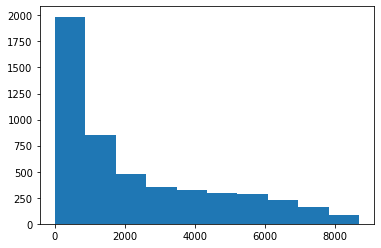

In [5]:
plt.hist(train.total_charges)

In [6]:
# 1. create the object - using mon max scalar
scaler1 = sklearn.preprocessing.MinMaxScaler()

# 2. fit the object
scaler1.fit(train[['total_charges']])

# 3. use the object
train['total_charges_scaled'] = scaler1.transform(train[['total_charges']])
test['total_charges_scaled'] = scaler1.transform(test[['total_charges']])
validate['total_charges_scaled'] = scaler1.transform(validate[['total_charges']])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


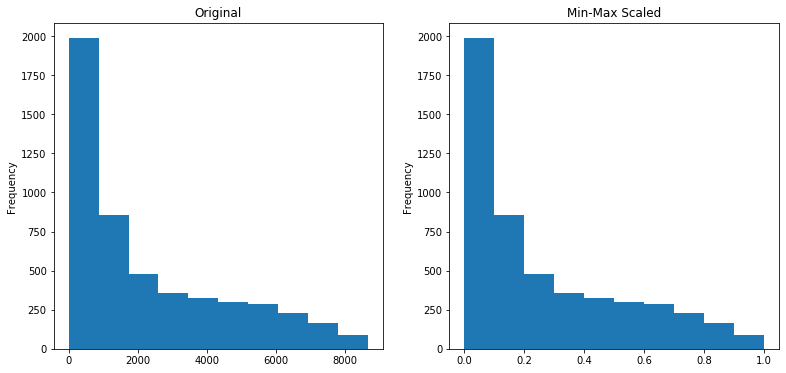

In [7]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_charges.plot.hist(title='Original')
plt.subplot(122)
train.total_charges_scaled.plot.hist(title='Min-Max Scaled')

# Scaling Monthly Charges

(array([1136.,  139.,  268.,  462.,  329.,  662.,  709.,  608.,  543.,
         214.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 10 Patch objects>)

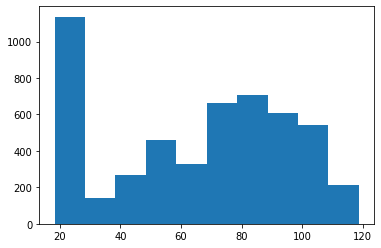

In [8]:
plt.hist(train.monthly_charges)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Standard Scaled')

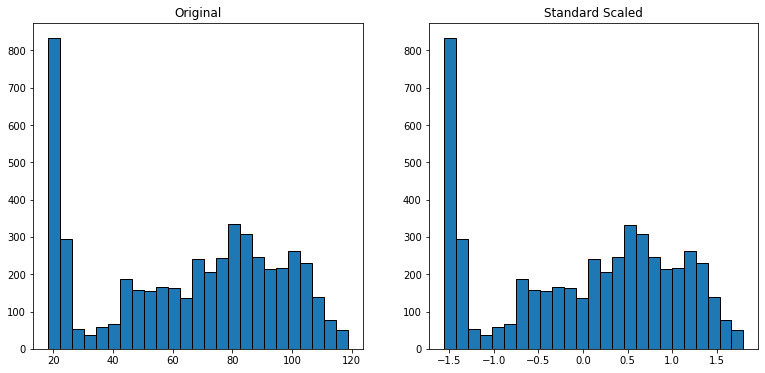

In [9]:
# 1. Create the object - using standard scalar
scaler2 = sklearn.preprocessing.StandardScaler()

# 2. Fit to the train data only
scaler2.fit(train[['monthly_charges']])

# 3. use the object
train['monthly_charges_scaled'] = scaler2.transform(train[['monthly_charges']])
test['monthly_charges_scaled'] = scaler2.transform(test[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler2.transform(validate[['monthly_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.monthly_charges_scaled, bins=25, ec='black')
plt.title('Standard Scaled')

# Scaling Tenure Months

(array([1211.,  549.,  400.,  378.,  341.,  351.,  324.,  349.,  360.,
         807.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <a list of 10 Patch objects>)

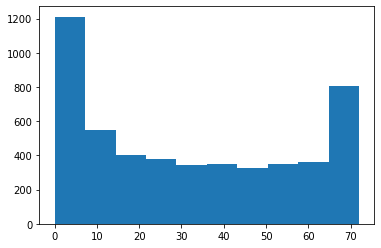

In [10]:
plt.hist(train.tenure_months)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Robust Scaled')

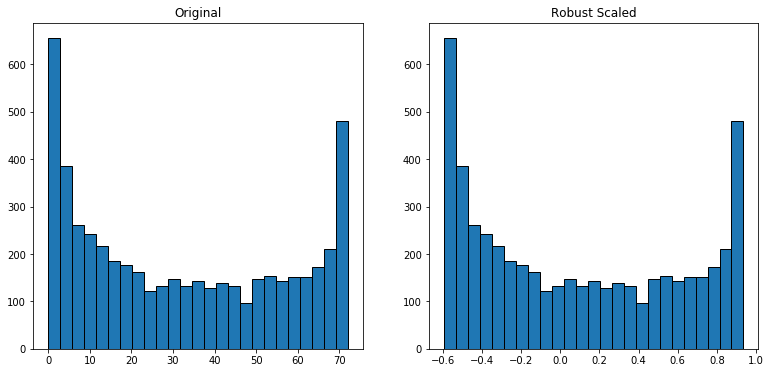

In [11]:
# 1. Create the object
scaler3 = sklearn.preprocessing.RobustScaler()

# 2. Fit to train data only
scaler3.fit(train[['tenure_months']])

# 3. use the object
train['tenure_months_scaled'] = scaler3.transform(train[['tenure_months']])
test['tenure_months_scaled'] = scaler3.transform(test[['tenure_months']])
validate['tenure_months_scaled'] = scaler3.transform(validate[['tenure_months']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.tenure_months, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.tenure_months_scaled, bins=25, ec='black')
plt.title('Robust Scaled')

In [12]:
# take a look at the scales columns added to the end
train.head()

,senior_citizen,tenure_months,phone_service,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,...,total_charges,churn,contract_type,Male,part_depd,service_type,tenure_years,total_charges_scaled,monthly_charges_scaled,tenure_months_scaled
855,0,4,2,1,0,0,0,0,0,0,...,201.10,1,0,1,0,3,0.33,0.023155,-0.439334,-0.510638
2823,0,1,1,2,0,0,0,0,0,1,...,81.95,1,0,0,0,3,0.08,0.009436,0.568928,-0.574468
5656,0,1,1,0,0,0,0,0,0,0,...,19.95,0,0,0,0,1,0.08,0.002297,-1.501015,-0.574468
1016,0,12,1,1,1,0,0,0,0,0,...,571.15,0,0,1,2,3,1.00,0.065764,-0.524469,-0.340426
1175,0,38,1,1,1,1,0,0,0,0,...,2076.05,0,0,0,2,3,3.17,0.239044,-0.347522,0.212766


2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [13]:
data_scales = train[['total_charges','total_charges_scaled']]
data_scales['inverse_transform1'] = scaler1.inverse_transform(train[['total_charges_scaled']])

data_scales['monthly_charges'] = train['monthly_charges']
data_scales['monthly_charges_scaled'] = train['monthly_charges_scaled']
data_scales['inverse_transform2'] = scaler2.inverse_transform(train[['monthly_charges_scaled']])

data_scales['tenure_months'] = train['tenure_months']
data_scales['tenure_months_scaled'] = train['tenure_months_scaled']
data_scales['inverse_transform3'] = scaler3.inverse_transform(train[['tenure_months_scaled']])

data_scales.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,total_charges,total_charges_scaled,inverse_transform1,monthly_charges,monthly_charges_scaled,inverse_transform2,tenure_months,tenure_months_scaled,inverse_transform3
855,201.10,0.023155,201.10,51.75,-0.439334,51.75,4,-0.510638,4.0
2823,81.95,0.009436,81.95,81.95,0.568928,81.95,1,-0.574468,1.0
5656,19.95,0.002297,19.95,19.95,-1.501015,19.95,1,-0.574468,1.0
1016,571.15,0.065764,571.15,49.20,-0.524469,49.20,12,-0.340426,12.0
1175,2076.05,0.239044,2076.05,54.50,-0.347522,54.50,38,0.212766,38.0


### Scaled data that is inverse transformed matches the original data
- months changed to decimal

3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

### QuantileTransformer
- This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

- The transformation is applied on each feature independently. 

In [14]:
# 1. Create the object
scaler4 = sklearn.preprocessing.QuantileTransformer(output_distribution = 'normal')

# 2. Fit to the train data
scaler4.fit(train[['monthly_charges','total_charges','tenure_months']])

# 3. Use the object
train1 = scaler4.transform(train[['monthly_charges','total_charges','tenure_months']])
test1 = scaler4.transform(test[['monthly_charges','total_charges','tenure_months']])
validate1 = scaler4.transform(validate[['monthly_charges','total_charges','tenure_months']])

scaled = pd.DataFrame(train1)
scaled.columns = ['monthly_charges','total_charges','tenure_months']
scaled

,monthly_charges,total_charges,tenure_months
0,-0.393034,-0.931888,-0.947580
1,0.392492,-1.258235,-1.674186
2,-1.387908,-2.211127,-1.674186
3,-0.492137,-0.486325,-0.486480
4,-0.346817,0.268346,0.223916
...,...,...,...
5065,1.706255,0.655150,0.156199
5066,0.226489,0.356205,0.065284
5067,2.266914,2.034061,1.280981
5068,0.439001,-0.527581,-0.797044


Text(0.5, 1.0, 'Quantile Scaled Tenure Months')

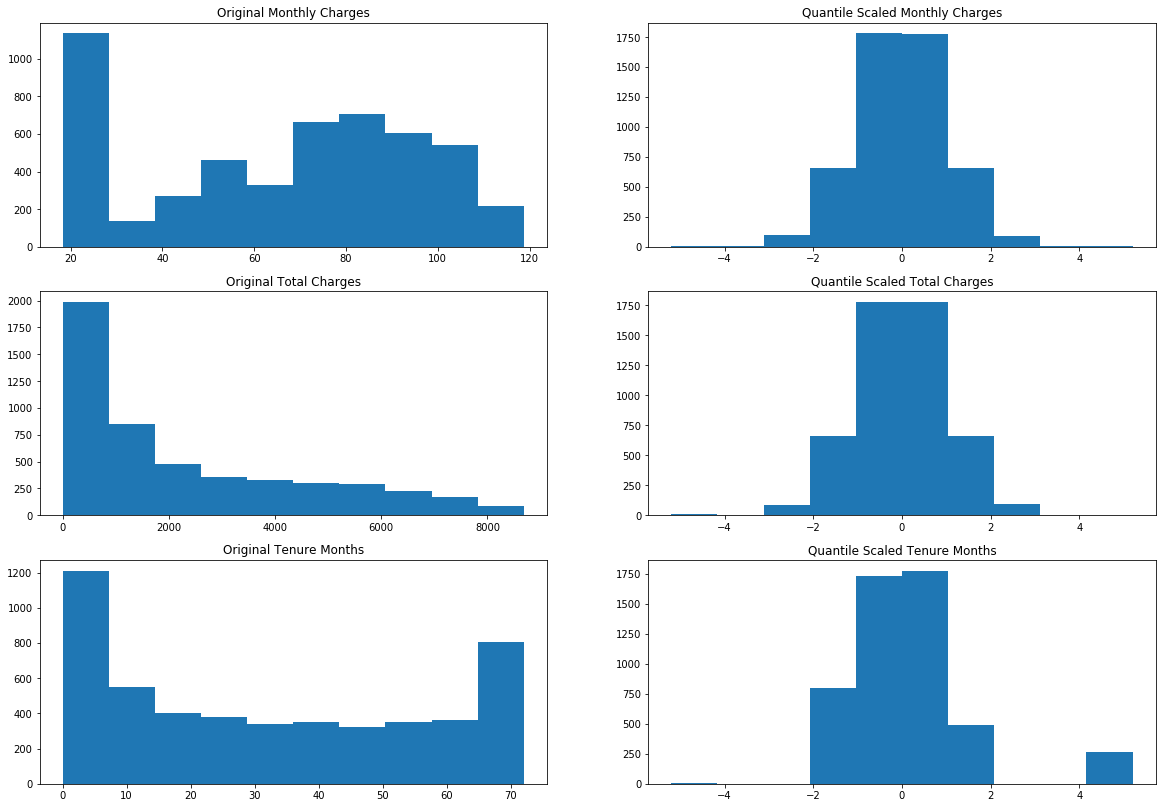

In [15]:
plt.figure(figsize=(20, 14))

plt.subplot(321)
plt.hist(train.monthly_charges)
plt.title('Original Monthly Charges')

plt.subplot(322)
plt.hist(scaled.monthly_charges)
plt.title('Quantile Scaled Monthly Charges')

plt.subplot(323)
plt.hist(train.total_charges)
plt.title('Original Total Charges')

plt.subplot(324)
plt.hist(scaled.total_charges)
plt.title('Quantile Scaled Total Charges')

plt.subplot(325)
plt.hist(train.tenure_months)
plt.title('Original Tenure Months')

plt.subplot(326)
plt.hist(scaled.tenure_months)
plt.title('Quantile Scaled Tenure Months')

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [16]:
# 1. Create the object
scaler5 = sklearn.preprocessing.QuantileTransformer()

# 2. Fit to the train data
scaler5.fit(train[['monthly_charges','total_charges','tenure_months']])

# 3. Use the object
train5 = scaler5.transform(train[['monthly_charges','total_charges','tenure_months']])
test5 = scaler5.transform(test[['monthly_charges','total_charges','tenure_months']])
validate5 = scaler5.transform(validate[['monthly_charges','total_charges','tenure_months']])

scaled5 = pd.DataFrame(train1)
scaled5.columns = ['monthly_charges','total_charges','tenure_months']
scaled5

,monthly_charges,total_charges,tenure_months
0,-0.393034,-0.931888,-0.947580
1,0.392492,-1.258235,-1.674186
2,-1.387908,-2.211127,-1.674186
3,-0.492137,-0.486325,-0.486480
4,-0.346817,0.268346,0.223916
...,...,...,...
5065,1.706255,0.655150,0.156199
5066,0.226489,0.356205,0.065284
5067,2.266914,2.034061,1.280981
5068,0.439001,-0.527581,-0.797044


Text(0.5, 1.0, 'Quantile Scaled Tenure Months')

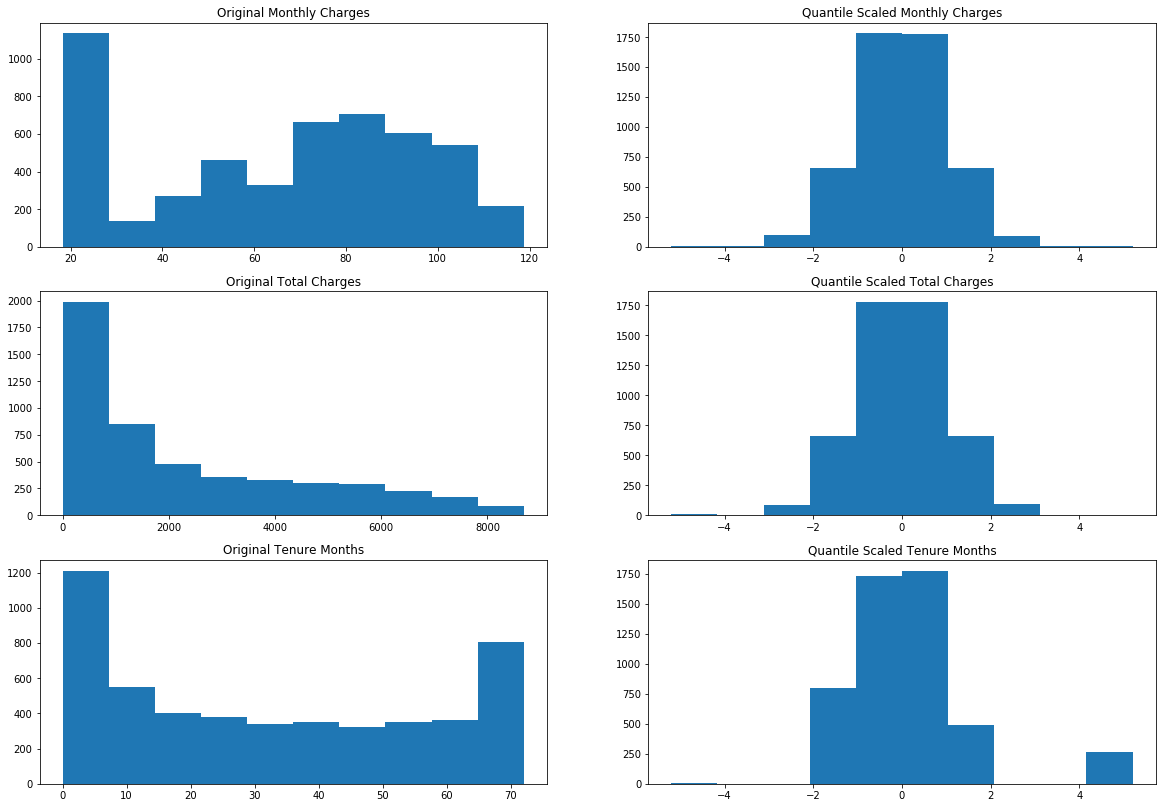

In [17]:
plt.figure(figsize=(20, 14))

plt.subplot(321)
plt.hist(train.monthly_charges)
plt.title('Original Monthly Charges')

plt.subplot(322)
plt.hist(scaled5.monthly_charges)
plt.title('Quantile Scaled Monthly Charges')

plt.subplot(323)
plt.hist(train.total_charges)
plt.title('Original Total Charges')

plt.subplot(324)
plt.hist(scaled5.total_charges)
plt.title('Quantile Scaled Total Charges')

plt.subplot(325)
plt.hist(train.tenure_months)
plt.title('Original Tenure Months')

plt.subplot(326)
plt.hist(scaled5.tenure_months)
plt.title('Quantile Scaled Tenure Months')

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

- linear transformations keep the shape of the data
- qunatile transformation creates a normal distribution

- Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.  

    - Standardization assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.  
    - μ=0 and σ=1
    
- Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks. 
    - the goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values
    - the cost of having this bounded range is that we will end up with smaller standard deviations, which can suppress the effect of outliers. Thus MinMax Scalar is sensitive to outliers

In [18]:
# the data does not follow a bell-curve, we will use a normalization transformation
# will use quantile on teh complete dataset

# 1. Create the object
quantile_sclr = sklearn.preprocessing.QuantileTransformer(output_distribution = 'normal')

# 2. Fit to the train data
quantile_sclr.fit(train)

# 3. Use the object on train, test, and validate
train_scaled = quantile_sclr.transform(train)
test_scaled = quantile_sclr.transform(test)
validate_scaled = quantile_sclr.transform(validate)

columns = list(train.columns)

train = pd.DataFrame(train_scaled)
train.columns = columns

validate = pd.DataFrame(validate_scaled)
validate.columns = columns

test = pd.DataFrame(test_scaled)
test.columns = columns

In [19]:
train, validate, test = prepare.train_validate_test(df)

train shape:  (5070, 21) , validate shape:  (1268, 21) , test shape:  (705, 21)

train percent:  72.0 , validate percent:  18.0 , test percent:  10.0


In [20]:
train.head()

,senior_citizen,tenure_months,phone_service,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,...,paperless_billing,auto_payment,monthly_charges,total_charges,churn,contract_type,Male,part_depd,service_type,tenure_years
0,-5.199338,-0.947580,5.199338,-0.292676,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,-5.199338,5.199338,-0.393034,-0.931888,5.199338,-5.199338,5.199338,-5.199338,5.199338,-0.947580
1,-5.199338,-1.674186,-0.427976,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,5.199338,...,5.199338,-5.199338,0.392492,-1.258235,5.199338,-5.199338,-5.199338,-5.199338,5.199338,-1.934489
2,-5.199338,-1.674186,-0.427976,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,-5.199338,5.199338,-1.387908,-2.211127,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-1.934489
3,-5.199338,-0.486480,-0.427976,-0.292676,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,5.199338,-5.199338,-0.492137,-0.486325,-5.199338,-5.199338,5.199338,5.199338,5.199338,-0.486480
4,-5.199338,0.223916,-0.427976,-0.292676,5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,-5.199338,-5.199338,-0.346817,0.268346,-5.199338,-5.199338,-5.199338,5.199338,5.199338,0.223916


In [21]:
validate.head()

,senior_citizen,tenure_months,phone_service,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,...,paperless_billing,auto_payment,monthly_charges,total_charges,churn,contract_type,Male,part_depd,service_type,tenure_years
0,-5.199338,-0.407442,5.199338,-0.292676,5.199338,5.199338,-5.199338,-5.199338,-5.199338,5.199338,...,-5.199338,-5.199338,-0.076604,-0.230281,-5.199338,-5.199338,5.199338,5.199338,5.199338,-0.407442
1,-5.199338,0.571638,-0.427976,5.199338,5.199338,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,...,-5.199338,-5.199338,0.436240,0.805644,5.199338,-5.199338,5.199338,0.290058,5.199338,0.571638
2,-5.199338,-1.061884,-0.427976,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,-5.199338,-5.199338,-3.089935,-1.496995,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-1.061884
3,5.199338,-1.674186,-0.427976,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,5.199338,-5.199338,-0.053973,-1.422096,5.199338,-5.199338,-5.199338,-5.199338,5.199338,-1.934489
4,-5.199338,-1.674186,-0.427976,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,-5.199338,-5.199338,-1.304121,-2.169694,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,-1.934489


In [22]:
test.head()

,senior_citizen,tenure_months,phone_service,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,...,paperless_billing,auto_payment,monthly_charges,total_charges,churn,contract_type,Male,part_depd,service_type,tenure_years
0,-5.199338,0.726606,-0.427976,-0.292676,5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,...,-5.199338,-5.199338,-0.304482,0.528730,-5.199338,-5.199338,5.199338,0.290058,5.199338,0.726606
1,-5.199338,0.129582,-0.427976,-0.292676,5.199338,-5.199338,5.199338,5.199338,5.199338,5.199338,...,5.199338,5.199338,0.296607,0.425797,-5.199338,0.407442,-5.199338,-5.199338,5.199338,0.129582
2,-5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,-5.199338,5.199338,...,-5.199338,5.199338,1.352623,1.930121,-5.199338,5.199338,5.199338,5.199338,5.199338,5.199338
3,5.199338,0.897655,5.199338,5.199338,5.199338,5.199338,5.199338,-5.199338,-5.199338,-5.199338,...,5.199338,-5.199338,0.631347,1.154710,-5.199338,-5.199338,5.199338,0.290058,5.199338,0.897655
4,-5.199338,0.292676,-0.427976,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,5.199338,-5.199338,-1.349498,-0.269446,-5.199338,5.199338,5.199338,5.199338,-5.199338,0.292676


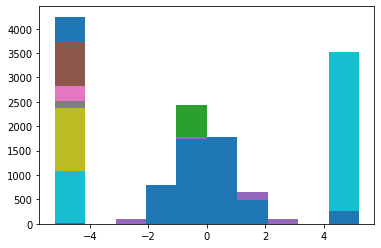

In [24]:
# all within range of -5 to 5
for x in train.columns:
    plt.hist(train[x])